# Importing Libraries

In [14]:
import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Dense,MaxPool2D,Conv2D,Dropout,Flatten,BatchNormalization,Activation
from keras.layers.advanced_activations import ELU
from keras.preprocessing.image import ImageDataGenerator
import os
from keras.models import Sequential


# Preprocessing Data

In [32]:
num_classes = 20
img_rows, img_cols = 32, 32
batch_size = 16

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'train',
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        'validation',
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')

Found 19548 images belonging to 20 classes.
Found 990 images belonging to 20 classes.


# Creating Little VGG 

# Using 2 convo,relu then  Pooling and dropout for 3 times with 64(3,3),  128(3,3),  256(3,3) then three fully connected layer  with units = 256, 256, num_classes

In [35]:
model = Sequential()

#1st Layer
model.add(Conv2D(64, (3, 3), padding = 'same', input_shape = (img_rows, img_cols, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

#2nd Layer

model.add(Conv2D(64, (3, 3), padding = 'same', input_shape = (img_rows, img_cols, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

#Pooling and dropouts

model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

#3rd Layer
model.add(Conv2D(128, (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

#4th Layer

model.add(Conv2D(128, (3, 3), padding = 'same', ))
model.add(Activation('relu'))
model.add(BatchNormalization())

#Pooling and dropouts

model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))


#5th Layer
model.add(Conv2D(256, (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

#6th Layer

model.add(Conv2D(256, (3, 3), padding = 'same', ))
model.add(Activation('relu'))
model.add(BatchNormalization())

#Pooling and dropouts


model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

#1st FullyCOnnected layer with units 256
model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

#2nd FullyCOnnected layer with units 256

model.add(Dense(256))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

#3rd FullyCOnnected layer with units 256

model.add(Dense(num_classes))
model.add(Activation('softmax'))

print(model.summary())




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_25 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_23 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_26 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_24 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 64)        0         
__________

# Traing LittleVGG

In [36]:
from keras.optimizers import RMSprop, SGD, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

                     
checkpoint = ModelCheckpoint("simpsons_little_vgg.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.00001)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint, reduce_lr]

# We use a very small learning rate 
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(lr=0.01),
              metrics = ['accuracy'])

nb_train_samples = 19548
nb_validation_samples = 990
epochs = 10

history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

Epoch 1/10
1221/1221 [==============================] - 867s 710ms/step - loss: 2.6354 - acc: 0.2273 - val_loss: 2.3928 - val_acc: 0.2782

Epoch 00001: val_loss improved from inf to 2.39281, saving model to simpsons_little_vgg.h5
Epoch 2/10
1221/1221 [==============================] - 825s 676ms/step - loss: 2.1602 - acc: 0.3386 - val_loss: 2.1471 - val_acc: 0.3696

Epoch 00002: val_loss improved from 2.39281 to 2.14708, saving model to simpsons_little_vgg.h5
Epoch 3/10
1221/1221 [==============================] - 794s 650ms/step - loss: 1.9026 - acc: 0.4305 - val_loss: 1.7604 - val_acc: 0.4713

Epoch 00003: val_loss improved from 2.14708 to 1.76038, saving model to simpsons_little_vgg.h5
Epoch 4/10
1221/1221 [==============================] - 769s 630ms/step - loss: 1.6992 - acc: 0.4910 - val_loss: 1.7859 - val_acc: 0.4795

Epoch 00004: val_loss did not improve from 1.76038
Epoch 5/10
1221/1221 [==============================] - 786s 644ms/step - loss: 1.4090 - acc: 0.5791 - val_loss:

## Performance Analysis

Found 990 images belonging to 20 classes.
Confusion Matrix
[[35  0  0  0  0  0  0  5  2  0  2  0  0  0  1  0  1  0  0  2]
 [ 0 50  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 44  0  2  0  1  0  0  0  0  2  1  0  0  0  0  0  0  0]
 [ 0  0  2 33  3  0  0  2  1  1  0  1  0  0  0  2  0  0  2  1]
 [ 0  0  0  0 47  0  0  0  0  1  0  0  0  0  2  0  0  0  0  0]
 [ 1  1  0  0  2 36  0  0  0  3  0  0  0  2  2  0  1  1  0  0]
 [ 0  1  0  0  0  0 43  0  1  1  0  0  0  0  0  0  4  0  0  0]
 [ 1  0  2  0  0  0  0 41  0  1  0  0  0  0  4  1  0  0  0  0]
 [ 0  0  0  0  1  0  0  0 47  0  0  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 49  0  0  1  0  0  0  0  0  0  0]
 [ 0  1  0  4  2  0  0  2  1  0 36  0  0  1  0  0  2  0  0  1]
 [ 0  0 10  0  1  0  1  1  1  0  0 33  0  1  1  1  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  1  0  0  0 45  0  2  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  2  0  0  0  0 47  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0 47  0  0  0  0 

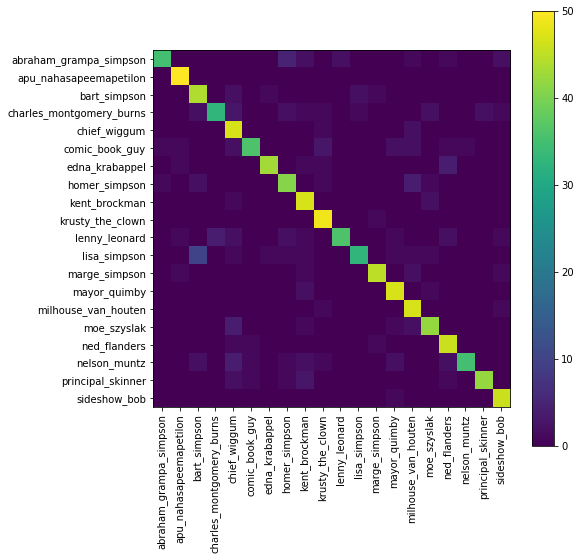

In [39]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# We need to recreate our validation generator with shuffle = false
validation_generator = test_datagen.flow_from_directory(
        'validation',
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

nb_train_samples = 19548
nb_validation_samples = 990

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

In [48]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import os
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join
import re

def draw_test(name, pred, im, true_label):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 160, 0, 0, 300 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, "predited - "+ pred, (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2.putText(expanded_image, "true - "+ true_label, (20, 120) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0), 2)
    cv2.imshow(name, expanded_image)
    

def getRandomImage(path, img_width, img_height):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    final_path = file_path + "/" + image_name
    return image.load_img(final_path, target_size = (img_width, img_height)), final_path, path_class

# dimensions of our images
img_width, img_height = 32, 32

files = []
predictions = []
true_labels = []

# predicting images
for i in range(0, 10):
    path = 'validation' 
    img, final_path, true_label = getRandomImage(path, img_width, img_height)
    files.append(final_path)
    true_labels.append(true_label)
    x = image.img_to_array(img)
    x = x * 1./255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = classifier.predict_classes(images, batch_size = 10)
    predictions.append(classes)
    
for i in range(0, len(files)):
    image = cv2.imread((files[i]))
    image = cv2.resize(image, None, fx=5, fy=5, interpolation = cv2.INTER_CUBIC)
    draw_test("Prediction", class_labels[predictions[i][0]], image, true_labels[i])
    cv2.waitKey(0)

cv2.destroyAllWindows()

FileNotFoundError: [Errno 2] No such file or directory: 'validationmarge_simpson'